In [2]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_dataset.head())
print("Number of observations: ", len(sanjuan_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [4]:
sanjuan_cases = sanjuan_dataset["total_cases"].values
print(sanjuan_cases.shape)

(988,)


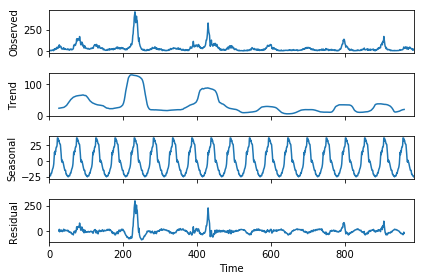

In [5]:
sm.tsa.seasonal_decompose(sanjuan_cases, freq = 52).plot()
# result = sm.tsa.stattools.adfuller(sanjuan_cases)
# print(result)
print("")

In [10]:
split_index = int(len(sanjuan_cases)* 0.7)
window_size = 4
future_steps = 4
train = sanjuan_cases[:split_index+window_size]

#Test goes from train to end - future_steps (as this data will be feed into the model)
#Expected is always future_steps ahead of test as this is the expected predictions
test = sanjuan_cases[split_index+window_size-future_steps:-future_steps]
expected = sanjuan_cases[split_index+window_size:]

print(test[-5:])
print(expected[-5:])
print(train.shape)
print(test.shape)
print(expected.shape)
print(sanjuan_cases[-5:])

[28 28 22 26 24]
[24  9 21 10 15]
(695,)
(293,)
(293,)
[24  9 21 10 15]
